In [310]:
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import csv
from sklearn.utils import shuffle
import tensorflow as tf
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel , AutoModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
import os 
import string 
import glob
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

### In the first instance, I tried to filter each data set in the part in order to organize my data in such a way that in the end I create a single complex data set with all the information necessary to solve task 1

In [277]:
def read_csv(name):
    dataset_name = name
    dataset = pd.read_csv(dataset_name, delimiter=",")
    return dataset

player_logins = read_csv('Copy of player_logins_v2023.csv')
player_purchases = read_csv('Copy of player_purchases_v2023.csv')
player_sample = read_csv('Copy of player_sample_v2023.csv')
player_spend = read_csv('Copy of player_spend_v2023.csv')

In [278]:
player_sample
#I added a new binary column, 0 was not purchased new version Fifa 1, it was purchased
player_sample['purchaseFIFA21'] = np.where(player_sample['purchase_date'].isna(), 0, 1)
player_sample.rename(columns = {'purchase_date':'FIFA21_purchase_date'}, inplace = True)
player_sample

,FIFA21_purchase_date,id,purchaseFIFA21
0,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1
1,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1
2,11/24/2020,c11e2a8ff857babd62628fcecc66340e9d828967,1
3,NaN,5f639924f04f27d3a49f290fcc5608fda1c58750,0
4,NaN,d1f943556959c23e9ad0eac81d6135c157de59ea,0
...,...,...,...
4995,NaN,716277afa26ac2d5a5fdd933b0dc5288769f6d61,0
4996,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1
4997,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1
4998,NaN,10768f2ecb5d7398edd6ef768d6c1749eb34d1cb,0


In [279]:
#I filtered the data set to get how many games each player bought.
player_purchases

,game_name,id,game_genre,game_launch_date,purchase_date
0,FIFA 19,dcd105ca0578cc70bf583cc850d1ce42882b60bc,Sports,9/29/2018,5/15/2019
1,FIFA 20,f0a590423cfc21119196892b0fe962b1af0bdbe4,Sports,9/28/2019,10/8/2019
2,BATTLEFIELD 1,b888d9606600bd0cf76d577103eedf120ec3ab96,Shooter,10/21/2017,11/20/2019
3,MADDEN 19,1662b5f631864768d112fe18861010a958c6ef95,Sports,12/30/1900,9/3/2018
4,FIFA 20,e18199799ba3ee45efa898d8adfa8ad7d724ee40,Sports,9/28/2019,6/5/2020
...,...,...,...,...,...
12395,MADDEN 19,182f4ff07bcdd6ca27288f322372e3ee4c781ed6,Sports,12/30/1900,11/28/2018
12396,FIFA 19,d12a88483d506b45b17d6fc1a3c910df0182db7c,Sports,9/29/2018,3/1/2019
12397,FIFA 19,223fdb144d534e4e53c17ea358504f0bf79f837d,Sports,9/29/2018,10/6/2018
12398,NFS 2016,1056d8652567af9281acbcf8a4e85e5f784dc58f,Action,11/2/2016,1/31/2020


In [280]:
player_purchases_filtered = player_purchases.groupby(["id"]).size()
player_purchases_filtered = player_purchases_filtered.reset_index()
player_purchases_filtered.columns = ["id", "num_purchases"]
player_purchases_filtered = player_purchases_filtered.sort_values(by=["id", "num_purchases"], ascending=True)
player_purchases_filtered

,id,num_purchases
0,0005f889da556e88fb52f4a38d9fd78892121254,1
1,00076883422376007974b13789be3174a102db30,2
2,000f0d7eda6adffdca585f04fb200893fc87e81f,3
3,00304c69684e1248264e07025fa237f5726eb76c,4
4,00340b5497c268fb3f8a98369294e6cd8f888653,1
...,...,...
4833,ffb46ba32d80a4cef8a103c4145fbb12be20f878,2
4834,ffbc2f8b178cff0124379f4088d9c5a1f742d544,2
4835,ffbff0aa383d4d91e7228dadadbbd0b70733c256,4
4836,ffc7fef0cfe3839947b937052fecddb5ed2f6a3d,5


In [281]:
player_logins

,game_name,login_day,login_count,id
0,NHL 20,5/19/2020,1,40f5565f76a664be92f14e4e44217928f69a5f3c
1,FIFA 20,12/12/2019,1,2e4f2ce4cda6e337e18a4224d51ee8f7e4b9c500
2,MADDEN 20,3/2/2020,1,e61c79a73b7b221a28d9c8955ebd29195fcdefc3
3,FIFA 19,3/6/2019,1,b673920721de6e62410eb5ba76a79ee76f5135cf
4,BATTLEFIELD 4,7/17/2020,5,0270cb8d2b7cbf99692542e402c741d0dbc65aac
...,...,...,...,...
482903,FIFA 20,6/23/2020,3,0875273867cf7ff6eb462c53a0141a108fb8f57e
482904,FIFA 20,12/22/2019,1,de17bf7c5165a79ddf6f87d4e53c9ea7b8d3f7f0
482905,FIFA 18,11/16/2019,1,8cb43898958233d00b8b06bc27f7cdb5b4439962
482906,MADDEN 18,1/24/2019,1,ecf5967e1fd8d3dcbbdf70ec17be9d188142d52c


### In player_logins_filtered I tried to focus on the total number of logins around all games as that is what I am interested in for Task 1.1. For a deeper analysis, I could only focus on the total number of logins of FIFA games, since Task1.1 only focuses on FIFA 21

In [282]:
player_logins_filtered = player_logins.groupby(["id"])["login_count"].sum()
player_logins_filtered = player_logins_filtered.reset_index()
player_logins_filtered.columns = ['id', "num_login"]
player_logins_filtered = player_logins_filtered.sort_values(by=["id"], ascending=True)
player_logins_filtered


,id,num_login
0,0005f889da556e88fb52f4a38d9fd78892121254,1
1,00076883422376007974b13789be3174a102db30,3
2,000f0d7eda6adffdca585f04fb200893fc87e81f,121
3,0025af253aa0ca62b48b0b934677fc8bc49a66c5,1
4,00304c69684e1248264e07025fa237f5726eb76c,79
...,...,...
4995,ffb46ba32d80a4cef8a103c4145fbb12be20f878,867
4996,ffbc2f8b178cff0124379f4088d9c5a1f742d544,49
4997,ffbff0aa383d4d91e7228dadadbbd0b70733c256,157
4998,ffc7fef0cfe3839947b937052fecddb5ed2f6a3d,389


In [283]:
player_spend
#I filtered the data set to get the number of extra_content purchased by every player

,game_name,spend_day,id
0,MADDEN 21,8/10/2020,fbe9a553cdf6170131c761f69e9d4a567cb53a8d
1,FIFA 20,8/18/2020,808b44d5f8bf4b02085caa004adc6d051b497971
2,FIFA 20,2/23/2020,c16bfc0bbf52b21f71a70f6e2302a41ebd3d39b9
3,FIFA 20,3/17/2020,f5ac146306d5e0d81bf4d1b959d38a33bf669b96
4,FIFA 20,4/23/2020,d4d7343ba0a233cdb900341b50acb1d8267028b8
...,...,...,...
5017,FIFA 20,12/3/2019,3f21a77f91ac121e175085cdc11270e0f7f9fc1d
5018,FIFA 20,6/4/2020,3fe3d7c6667e046c32039803be1402e81e2540c5
5019,FIFA 20,12/31/2019,744888fbd5d8f3d83f42329349ca6ced72a895a7
5020,FIFA 20,3/17/2020,e0aa179a9a6a0d6a907db727035aad9fa2efe25f


In [284]:
player_spend_filtered = player_spend.groupby(["id"]).size()
player_spend_filtered = player_spend_filtered.reset_index()
player_spend_filtered.columns = ["id","extra_content"]
player_spend_filtered = player_spend_filtered.sort_values(by=["id"], ascending=True)
player_spend_filtered

,id,extra_content
0,00cb1dfd4ec9de7cf4d27cdc619c3003b5653822,1
1,019063d309232f3669dd8976d03fc718e4a7fdae,1
2,021b2c5b6857511bac918d50feae1ce8c0a866c8,13
3,02cd923dbb5604f99a5da9c71f90fa041427c978,4
4,049725299d5a5b1cabc4e85a8a4bc8e19a0cf1af,6
...,...,...
604,fbe9a553cdf6170131c761f69e9d4a567cb53a8d,41
605,fbff6175127e0e54476d0c37ec2a0c8a10ec762c,34
606,fe0aba4c15fc6c4873a08f7f89fd632063bc48d1,20
607,fea36f380d4481be70d240f88220112719b504dc,19


### I'm starting to create my final dataset for solving Task1.1

In [285]:
merged_df1 = pd.merge(player_sample, player_purchases_filtered, on=['id'],how="outer")
merged_df1.fillna(0, inplace=True)
merged_df1

,FIFA21_purchase_date,id,purchaseFIFA21,num_purchases
0,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,8.0
1,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1,1.0
2,11/24/2020,c11e2a8ff857babd62628fcecc66340e9d828967,1,5.0
3,0,5f639924f04f27d3a49f290fcc5608fda1c58750,0,1.0
4,0,d1f943556959c23e9ad0eac81d6135c157de59ea,0,1.0
...,...,...,...,...
4995,0,716277afa26ac2d5a5fdd933b0dc5288769f6d61,0,1.0
4996,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,5.0
4997,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1,2.0
4998,0,10768f2ecb5d7398edd6ef768d6c1749eb34d1cb,0,1.0


In [286]:
merged_df2 = pd.merge(merged_df1, player_logins_filtered, on=['id'],how="outer")
merged_df2

,FIFA21_purchase_date,id,purchaseFIFA21,num_purchases,num_login
0,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,8.0,1116
1,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1,1.0,360
2,11/24/2020,c11e2a8ff857babd62628fcecc66340e9d828967,1,5.0,282
3,0,5f639924f04f27d3a49f290fcc5608fda1c58750,0,1.0,1
4,0,d1f943556959c23e9ad0eac81d6135c157de59ea,0,1.0,3
...,...,...,...,...,...
4995,0,716277afa26ac2d5a5fdd933b0dc5288769f6d61,0,1.0,3
4996,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,5.0,405
4997,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1,2.0,889
4998,0,10768f2ecb5d7398edd6ef768d6c1749eb34d1cb,0,1.0,4


In [287]:
merged_df3 = pd.merge(merged_df2, player_spend_filtered, on=['id'],how="outer")
merged_df3.fillna(0, inplace=True)
merged_df3

,FIFA21_purchase_date,id,purchaseFIFA21,num_purchases,num_login,extra_content
0,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,8.0,1116,13.0
1,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1,1.0,360,0.0
2,11/24/2020,c11e2a8ff857babd62628fcecc66340e9d828967,1,5.0,282,2.0
3,0,5f639924f04f27d3a49f290fcc5608fda1c58750,0,1.0,1,0.0
4,0,d1f943556959c23e9ad0eac81d6135c157de59ea,0,1.0,3,0.0
...,...,...,...,...,...,...
4995,0,716277afa26ac2d5a5fdd933b0dc5288769f6d61,0,1.0,3,0.0
4996,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,5.0,405,0.0
4997,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1,2.0,889,0.0
4998,0,10768f2ecb5d7398edd6ef768d6c1749eb34d1cb,0,1.0,4,0.0


In [288]:
merged_df3['num_purchases'] = merged_df3['num_purchases'].astype(int)
merged_df3['extra_content'] = merged_df3['extra_content'].astype(int)
merged_df3

,FIFA21_purchase_date,id,purchaseFIFA21,num_purchases,num_login,extra_content
0,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,8,1116,13
1,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1,1,360,0
2,11/24/2020,c11e2a8ff857babd62628fcecc66340e9d828967,1,5,282,2
3,0,5f639924f04f27d3a49f290fcc5608fda1c58750,0,1,1,0
4,0,d1f943556959c23e9ad0eac81d6135c157de59ea,0,1,3,0
...,...,...,...,...,...,...
4995,0,716277afa26ac2d5a5fdd933b0dc5288769f6d61,0,1,3,0
4996,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,5,405,0
4997,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1,2,889,0
4998,0,10768f2ecb5d7398edd6ef768d6c1749eb34d1cb,0,1,4,0


In [289]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FIFA21_purchase_date  5000 non-null   object
 1   id                    5000 non-null   object
 2   purchaseFIFA21        5000 non-null   int64 
 3   num_purchases         5000 non-null   int64 
 4   num_login             5000 non-null   int64 
 5   extra_content         5000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 273.4+ KB


In [290]:
merged_df3.describe()

,purchaseFIFA21,num_purchases,num_login,extra_content
count,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.50000,2.480000,277.182400,1.004400
std,0.50005,2.009181,456.625725,5.186768
min,0.00000,0.000000,1.000000,0.000000
25%,0.00000,1.000000,13.750000,0.000000
50%,0.50000,2.000000,90.000000,0.000000
75%,1.00000,3.000000,339.000000,0.000000
max,1.00000,16.000000,7944.000000,85.000000


In [320]:
X = merged_df3[["num_purchases", "num_login", "extra_content"]] 
y = merged_df3["purchaseFIFA21"]

In [321]:
# Split the data into training and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Evaluate the model performance using accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.689
Confusion matrix:
 [[436  77]
 [234 253]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.85      0.74       513
           1       0.77      0.52      0.62       487

    accuracy                           0.69      1000
   macro avg       0.71      0.68      0.68      1000
weighted avg       0.71      0.69      0.68      1000



## DecisionTreeClassifier

In [262]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.661
Confusion matrix:
 [[384 129]
 [210 277]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.75      0.69       513
           1       0.68      0.57      0.62       487

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



## RandomForestClassifier

In [336]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.70
Confusion matrix:
 [[376 137]
 [160 327]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72       513
           1       0.70      0.67      0.69       487

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



## Support Vector Machine (SVM)

In [264]:
svm = SVC(kernel="linear", C=1.0, random_state=42)
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.69


## NN model

In [299]:
model = keras.Sequential([
keras.layers.Dense(32, activation="relu", input_shape=(X.shape[1],)),
keras.layers.Dense(16, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test) > 0.5

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Epoch 1/10
125/125 [==============================] - 1s 885us/step - loss: 0.9215 - accuracy: 0.6727
Epoch 2/10
125/125 [==============================] - 0s 794us/step - loss: 0.6367 - accuracy: 0.6870
Epoch 3/10
125/125 [==============================] - 0s 794us/step - loss: 0.6796 - accuracy: 0.6892
Epoch 4/10
125/125 [==============================] - 0s 814us/step - loss: 0.7296 - accuracy: 0.6665
Epoch 5/10
125/125 [==============================] - 0s 870us/step - loss: 0.6516 - accuracy: 0.6880
Epoch 6/10
125/125 [==============================] - 0s 792us/step - loss: 0.6158 - accuracy: 0.6823
Epoch 7/10
125/125 [==============================] - 0s 845us/step - loss: 0.6956 - accuracy: 0.6933
Epoch 8/10
125/125 [==============================] - 0s 844us/step - loss: 0.6375 - accuracy: 0.6888
Epoch 9/10
125/125 [==============================] - 0s 844us/step - loss: 0.6362 - accuracy: 0.6830
Epoch 10/10
32/32 [==============================] - 0s 634us/step
Accuracy: 0.69


## Task1.3

### To evaluate the performance of the model I used the test loss and test accuracy that are returned by the model.evaluate method. These metrics measure how well the model can predict the purchase of FIFA 21 on unseen data. A lower test loss and a higher test accuracy indicate a better performance.
### I used other metrics, such as precision, recall, F1-score, or ROC AUC, to evaluate the model from different perspectives.
### I chose to compare the evaluations of the two best results between the NN model and the Random Forest model
### If NN model has a higher precision than the random forest model model, meaning that it makes fewer false positive predictions. Related to the recall if  the random forest model has a higher recall than the neural network model, meaning that it captures more of the true positive cases. For F1-score if for the neural network model is a slightly lower than the random forest model, meaning that it has a lower overall quality in terms of precision and recall. If the NN model has a much higher ROC AUC than the random forest model model, meaning that it can rank the instances by their probability of being positive more effectively.


In [300]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

32/32 [==============================] - 0s 856us/step - loss: 1.0270 - accuracy: 0.6870
Test loss: 1.0270, Test accuracy: 0.6870


### Neural network model evaluation

In [301]:
y_pred = model.predict(X_test) > 0.5 # class labels
y_prob = model.predict(X_test) # probabilities

# Calculate precision, recall, F1-score, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the metrics
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

32/32 [==============================] - 0s 643us/step
Precision: 0.6355, Recall: 0.8378, F1-score: 0.7228, ROC AUC: 0.7793


32/32 [==============================] - 0s 639us/step


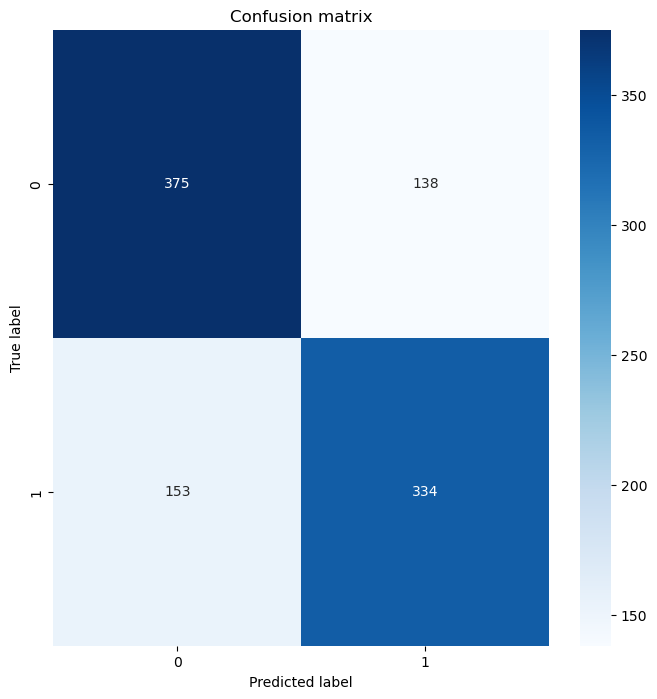

In [326]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

32/32 [==============================] - 0s 644us/step


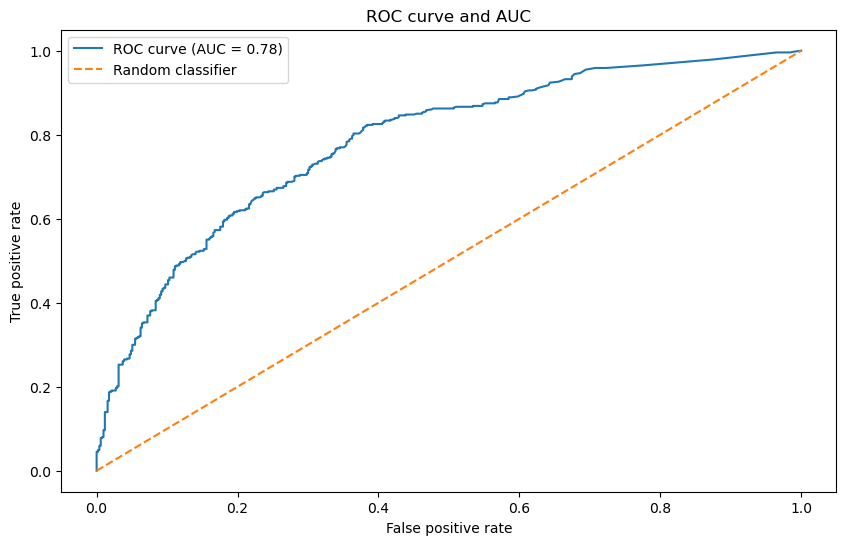

In [327]:
y_prob = model.predict(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve and AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.title('ROC curve and AUC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 0.6528 - accuracy: 0.6295 - val_loss: 0.5934 - val_accuracy: 0.6710
Epoch 2/10
125/125 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7015 - val_loss: 0.5780 - val_accuracy: 0.7040
Epoch 3/10
125/125 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7035 - val_loss: 0.5739 - val_accuracy: 0.7040
Epoch 4/10
125/125 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.7057 - val_loss: 0.5719 - val_accuracy: 0.7050
Epoch 5/10
125/125 [==============================] - 0s 1ms/step - loss: 0.5729 - accuracy: 0.7090 - val_loss: 0.5698 - val_accuracy: 0.7100
Epoch 6/10
125/125 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.7143 - val_loss: 0.5711 - val_accuracy: 0.7040
Epoch 7/10
125/125 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7107 - val_loss: 0.5675 - val_accuracy: 0.7120
Epoch 

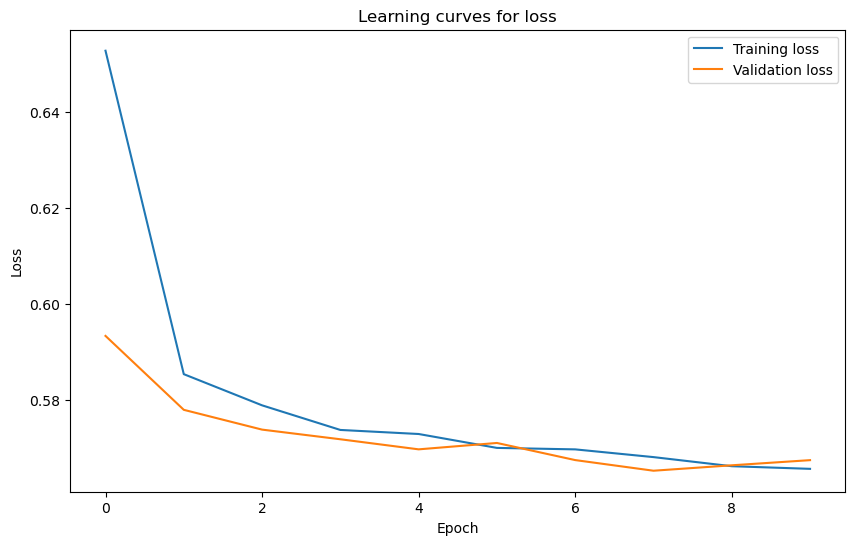

In [324]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the learning curves for loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Learning curves for loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


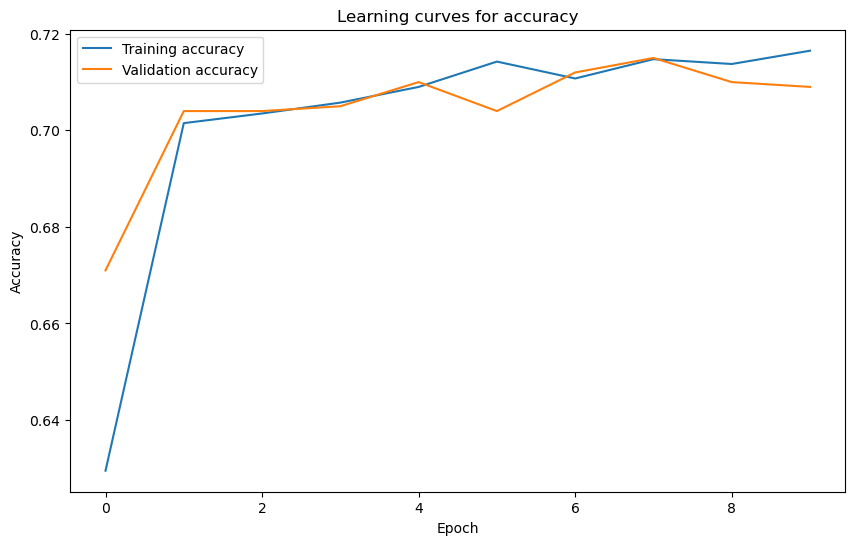

In [325]:
# Plot the learning curves for accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Learning curves for accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [323]:
# Predict the probability of purchasing FIFA 21 for a new player
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
new_player = np.array([[100, 80, 5]]) # Example of a new player's features
new_player = scaler.transform(new_player) # Scale the features using the same scaler as before
pred_prob = model.predict(new_player) # Predict the probability using the model
print('Predicted probability of purchasing FIFA 21:', pred_prob[0][0])


1/1 [==============================] - 0s 16ms/step
Predicted probability of purchasing FIFA 21: 4.0133777e-30


### Randorm Forest model evaluation

In [268]:
y_pred = rf.predict(X_test) > 0.5 # class labels
y_prob = rf.predict(X_test) # probabilities

# Calculate precision, recall, F1-score, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the metrics
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

Precision: 0.7047, Recall: 0.6715, F1-score: 0.6877, ROC AUC: 0.7022


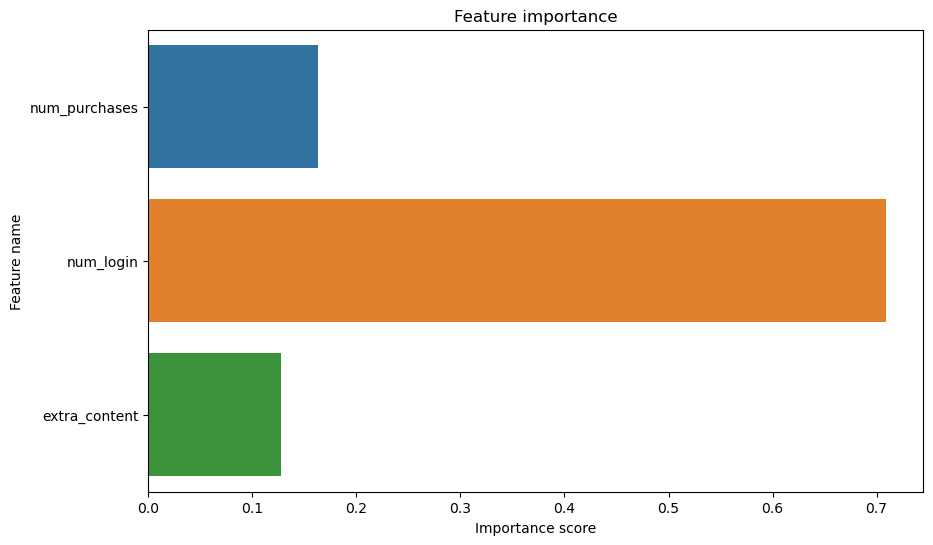

In [330]:
# Get the feature importance scores
importances = rf.feature_importances_

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature importance')
plt.xlabel('Importance score')
plt.ylabel('Feature name')
plt.show()

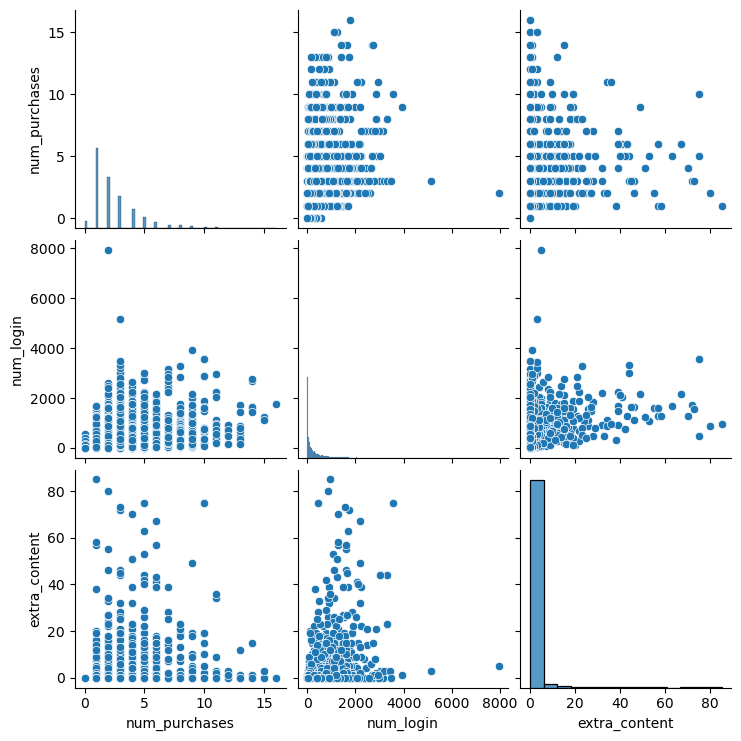

In [350]:
# Select 5 features to plot
features = ['num_purchases', 'num_login', 'extra_content']

# Plot a pairplot for the selected features
sns.pairplot(merged_df3[features])
plt.show()

## Task1.4

### For some future improvements I could perform hyperparameter tuning and optimization, such as using grid search, random search, or Bayesian optimization to find the optimal values of the model parameters that can maximize the performance metrics. Or I can try different algorithms or architectures, such as using different types of neural networks (e.g., convolutional, recurrent, attention-based) or different types of random forests (e.g., extra trees, gradient boosting) that can better suit the problem or the data.
### Or another aspect  to perform some feature engineering and selection processes, such as creating new features or transforming existing ones that can capture more information from the data, or removing irrelevant or redundant features that can reduce the noise or complexity of the model.

## Task1.5

### The insights that brought a plus to the understanding of the problem and the development of the model were the trend of the purchase date, which can show the popularity and seasonality of the game,  relationship between the number of purchases, number of login, and extra content, which can show the engagement and loyalty of the players for a certain game or games. And the correlation and prediction of the purchase of FIFA 21 based on the features, which can show the factors that influence the purchase decision.

## Task1.6

### From my perspective I would mention how I used data analysis and machine learning techniques to build a neural network model that can predict the purchase of FIFA 21 based on various features, such as purchase date, player id, number of purchases, number of login, and extra content.
### I would point out some of the key findings and insights that we gained from the model, such as the factors that influence the purchase decision, the segmentation and profiling of the players, the distribution and trend of the purchase date, and the relationship between the engagement and loyalty of the players.
### Can be shared some of the performance metrics and results of the model, such as the accuracy, precision, recall, F1-score, and ROC AUC, and how they compare with other models or benchmarks. I can also explain how we evaluated and tested the model using a separate test dataset and various metrics.
### And the last but not least, I would point out how we used the model to improve some sales strategies, how we maybe targeting the most potential and profitable customers, through offering personalized promotions, through optiomization of the customer satisfaction

## Task1.2

In [186]:
player_purchases

,game_name,id,game_genre,game_launch_date,purchase_date
0,FIFA 19,dcd105ca0578cc70bf583cc850d1ce42882b60bc,Sports,9/29/2018,5/15/2019
1,FIFA 20,f0a590423cfc21119196892b0fe962b1af0bdbe4,Sports,9/28/2019,10/8/2019
2,BATTLEFIELD 1,b888d9606600bd0cf76d577103eedf120ec3ab96,Shooter,10/21/2017,11/20/2019
3,MADDEN 19,1662b5f631864768d112fe18861010a958c6ef95,Sports,12/30/1900,9/3/2018
4,FIFA 20,e18199799ba3ee45efa898d8adfa8ad7d724ee40,Sports,9/28/2019,6/5/2020
...,...,...,...,...,...
12395,MADDEN 19,182f4ff07bcdd6ca27288f322372e3ee4c781ed6,Sports,12/30/1900,11/28/2018
12396,FIFA 19,d12a88483d506b45b17d6fc1a3c910df0182db7c,Sports,9/29/2018,3/1/2019
12397,FIFA 19,223fdb144d534e4e53c17ea358504f0bf79f837d,Sports,9/29/2018,10/6/2018
12398,NFS 2016,1056d8652567af9281acbcf8a4e85e5f784dc58f,Action,11/2/2016,1/31/2020


In [187]:
merged_df4 = pd.merge(player_sample, player_purchases, on=['id'],how="outer")
merged_df4.fillna(0, inplace=True)
merged_df4

,FIFA21_purchase_date,id,purchaseFIFA21,game_name,game_genre,game_launch_date,purchase_date
0,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,NHL 20,Sports,9/14/2019,12/28/2019
1,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,BATTLEFIELD 4,Shooter,10/29/2014,9/18/2019
2,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,PGA TOUR GOLF 16,Sports,12/30/1900,8/17/2020
3,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,UFC 2,Fighting,3/9/2017,3/29/2019
4,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,FIFA 19,Sports,9/29/2018,10/5/2018
...,...,...,...,...,...,...,...
12557,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,FIFA 20,Sports,9/28/2019,12/20/2019
12558,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1,FIFA 20,Sports,9/28/2019,9/30/2019
12559,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1,FIFA 19,Sports,9/29/2018,9/12/2019
12560,0,10768f2ecb5d7398edd6ef768d6c1749eb34d1cb,0,TITANFALL,Shooter,12/30/1900,10/15/2019


### Filter the dataset to keep only the rows where game_name is either FIFA 21 or FIFA 20, and game_genre is sports.

In [188]:
player_purchases_filtered_2 = merged_df4[(merged_df4["game_name"].isin(["FIFA 20"])) & (merged_df4["game_genre"] == "Sports") & (merged_df4["purchaseFIFA21"] == 1)]



In [189]:
player_purchases_filtered_2

,FIFA21_purchase_date,id,purchaseFIFA21,game_name,game_genre,game_launch_date,purchase_date
6,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,FIFA 20,Sports,9/28/2019,10/1/2019
8,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1,FIFA 20,Sports,9/28/2019,10/4/2019
13,11/24/2020,c11e2a8ff857babd62628fcecc66340e9d828967,1,FIFA 20,Sports,9/28/2019,10/16/2019
16,2/28/2021,49023b8b764b9ecd0384c9d6bbc5c81e4bce7704,1,FIFA 20,Sports,9/28/2019,11/19/2019
20,2/27/2021,87b520c11ffceb799d0ac49a6867fc6fe3d071b2,1,FIFA 20,Sports,9/28/2019,12/21/2019
...,...,...,...,...,...,...,...
12541,10/3/2020,21a520e7efd94f99c81ea1b41d61f388a5f145fa,1,FIFA 20,Sports,9/28/2019,1/7/2020
12547,10/15/2020,7296a62021547c153295060305c20dd631d5a2cc,1,FIFA 20,Sports,9/28/2019,11/5/2019
12548,11/1/2020,5ad2954056e21c9afd005f1174c465a143e44fc5,1,FIFA 20,Sports,9/28/2019,2/29/2020
12557,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,FIFA 20,Sports,9/28/2019,12/20/2019


### I tried to create a data set with both FIFA 20 and FIFA21 information

In [190]:
df = player_purchases_filtered_2
shifted_df = df.loc[df.index.repeat(2)]

shifted_df = shifted_df.reset_index(drop=True)

for i in range(len(shifted_df)):
    if (i % 2) != 0:
        shifted_df['game_name'][i] ='FIFA 21'
        shifted_df['game_launch_date'][i] = '8/14/2020'
        shifted_df['purchase_date'][i] = shifted_df['FIFA21_purchase_date'][i]
    
player_purchases_filtered_2 = shifted_df
player_purchases_filtered_2

/var/folders/ph/prmd5g8j6vs8gsdh6hrmfy8h0000gq/T/ipykernel_92103/1840965505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifted_df['game_name'][i] ='FIFA 21'
/var/folders/ph/prmd5g8j6vs8gsdh6hrmfy8h0000gq/T/ipykernel_92103/1840965505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifted_df['game_launch_date'][i] = '8/14/2020'
/var/folders/ph/prmd5g8j6vs8gsdh6hrmfy8h0000gq/T/ipykernel_92103/1840965505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,FIFA21_purchase_date,id,purchaseFIFA21,game_name,game_genre,game_launch_date,purchase_date
0,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,FIFA 20,Sports,9/28/2019,10/1/2019
1,10/2/2020,86b4ae7a794d4c196435cd0a63e83303cd3e6f34,1,FIFA 21,Sports,8/14/2020,10/2/2020
2,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1,FIFA 20,Sports,9/28/2019,10/4/2019
3,9/28/2020,3fd1574f04d7a380eaf913c9d86cb755d005d84c,1,FIFA 21,Sports,8/14/2020,9/28/2020
4,11/24/2020,c11e2a8ff857babd62628fcecc66340e9d828967,1,FIFA 20,Sports,9/28/2019,10/16/2019
...,...,...,...,...,...,...,...
4071,11/1/2020,5ad2954056e21c9afd005f1174c465a143e44fc5,1,FIFA 21,Sports,8/14/2020,11/1/2020
4072,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,FIFA 20,Sports,9/28/2019,12/20/2019
4073,9/30/2020,dde6ad68dfacd8715061fa503ea63de7fa1a85d5,1,FIFA 21,Sports,8/14/2020,9/30/2020
4074,12/10/2020,934ea0399065492da9cf26e7a535bc81e788764a,1,FIFA 20,Sports,9/28/2019,9/30/2019


In [191]:
player_purchases_filtered_2["game_launch_date"] = pd.to_datetime(player_purchases_filtered_2["game_launch_date"])
player_purchases_filtered_2["purchase_date"] = pd.to_datetime(player_purchases_filtered_2["purchase_date"])
player_purchases_filtered_2["FIFA21_purchase_date"] = pd.to_datetime(player_purchases_filtered_2["FIFA21_purchase_date"])

### Create a new column called months_after_launch that calculates the number of months between purchase_date and game_launch_date for each row.

In [193]:
player_purchases_filtered_2["months_after_launch"] = (player_purchases_filtered_2["purchase_date"].dt.year - player_purchases_filtered_2["game_launch_date"].dt.year) * 12 + (player_purchases_filtered_2["purchase_date"].dt.month - player_purchases_filtered_2["game_launch_date"].dt.month)

### Group the dataset by game_name and months_after_launch, and count the number of unique player_id for each group. This will give the total number of players for each game in each month after launch.

In [195]:
player_purchases_filtered_2 = player_purchases_filtered_2.groupby(["game_name", "months_after_launch"])["id"].nunique().reset_index()


In [196]:
player_purchases_filtered_2 = player_purchases_filtered_2.rename(columns={"id": "total_players"})

In [197]:
player_purchases_filtered_2

,game_name,months_after_launch,total_players
0,FIFA 20,0,438
1,FIFA 20,1,552
2,FIFA 20,2,127
3,FIFA 20,3,251
4,FIFA 20,4,143
5,FIFA 20,5,87
6,FIFA 20,6,71
7,FIFA 20,7,81
8,FIFA 20,8,76
9,FIFA 20,9,83


### Create a new column called growth_rate that calculates the percentage change in the total number of players from the previous month for each game. This will give the monthly growth rate for each game.

In [198]:
player_purchases_filtered_2["growth_rate"] = player_purchases_filtered_2.groupby("game_name")["total_players"].pct_change()
player_purchases_filtered_2.fillna(0, inplace=True)

###  Create a linear regression model that takes months_after_launch as the independent variable and growth_rate as the dependent variable for each game. This will give the slope and intercept of the best-fit line that describes the relationship between months_after_launch and growth_rate for each game.

In [199]:
model_21 = LinearRegression()
model_20 = LinearRegression()

In [200]:
X_21 = player_purchases_filtered_2[player_purchases_filtered_2["game_name"] == "FIFA 21"]["months_after_launch"].values.reshape(-1, 1)
y_21 = player_purchases_filtered_2[player_purchases_filtered_2["game_name"] == "FIFA 21"]["growth_rate"].values.reshape(-1, 1)
model_21.fit(X_21, y_21)

LinearRegression()

In [201]:
X_20 = player_purchases_filtered_2[player_purchases_filtered_2["game_name"] == "FIFA 20"]["months_after_launch"].values.reshape(-1, 1)
y_20 = player_purchases_filtered_2[player_purchases_filtered_2["game_name"] == "FIFA 20"]["growth_rate"].values.reshape(-1, 1)
model_20.fit(X_20, y_20)

LinearRegression()

### Compare the slope and intercept of the linear regression model for FIFA 21 and FIFA 20. The slope indicates the average change in growth rate per month, and the intercept indicates the initial growth rate at launch. A higher slope or intercept means a higher growth rate.

In [202]:
slope_21 = model_21.coef_[0][0]
intercept_21 = model_21.intercept_[0]
slope_20 = model_20.coef_[0][0]
intercept_20 = model_20.intercept_[0]

In [203]:
print(f"FIFA 21: slope = {slope_21:.4f}, intercept = {intercept_21:.4f}")
print(f"FIFA 20: slope = {slope_20:.4f}, intercept = {intercept_20:.4f}")

FIFA 21: slope = 0.0016, intercept = -0.2435
FIFA 20: slope = -0.0059, intercept = -0.0173


### Calculate the relative growth of total number of players in FIFA 21 vs FIFA 20 by dividing the slope or intercept of FIFA 21 by the slope or intercept of FIFA 20. This will give a ratio that indicates how much faster or slower FIFA 21 is growing compared to FIFA 20.

In [204]:
relative_growth_slope = slope_21 / slope_20
relative_growth_intercept = intercept_21 / intercept_20

In [205]:
print(f"Relative growth by slope: {relative_growth_slope:.2f}")
print(f"Relative growth by intercept: {relative_growth_intercept:.2f}")

Relative growth by slope: -0.27
Relative growth by intercept: 14.04


## Task 2.1


From my perspective, I need to analyze first,the players who have a high probability of purchasing FIFA 21, according to the model output. These are the players who are most likely to be interested and motivated by the game features and benefits.<br>
The players who have a high number of purchases, number of login, and extra content in the previous editions of FIFA. These are the players who are most engaged and loyal.
The players who have a recent or late purchase date of FIFA 20. These are the players who are still active and involved in the current edition of FIFA.<br>

And if I will pay more attention to the features of the main dataset, I will try to follow:<br>
-The number of purchases , if is greater than 10, indicating a high level of engagement.<br>
-The number of login if is greater than 50, indicating a high frequency of usage.<br>
-The extra content if is greater than 5, indicating a high interest in additional features.<br>
-The purchase date of FIFA 20 if is within the last three months, indicating a recent or late adoption.<br>

### Below is a representation related to what I mentioned above.

In [270]:
y_pred = model.predict(X_test) > 0.5 # class labels
y_prob = model.predict(X_test) # probabilities

# Calculate precision, recall, F1-score, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the metrics
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

32/32 [==============================] - 0s 630us/step
Precision: 0.8186, Recall: 0.3799, F1-score: 0.5189, ROC AUC: 0.7853


In [271]:
X_test["pred"] = np.where(y_pred == False, 0, 1)

In [273]:
# Filter the dataframe using the criteria
filtered_df = X_test[(X_test["pred"] > 0.5) & (X_test["num_purchases"] > 10) & (X_test["num_login"] > 50) & (X_test["extra_content"] > 5)]
filtered_df



,num_purchases,num_login,extra_content,pred
1158,11,1123,34,1


### The player I would recommend to be included in the target audience for the pre-launch campaign

In [275]:
merged_df3.iloc[1158]

FIFA21_purchase_date                                   9/25/2020
id                      fbff6175127e0e54476d0c37ec2a0c8a10ec762c
purchaseFIFA21                                                 1
num_purchases                                                 11
num_login                                                   1123
extra_content                                                 34
Name: 1158, dtype: object

## Task2.2

The model executed in August 2021 was based on the data available at that time, which may not reflect the current situation and behavior of the players in December 2021. For example, some players may have already purchased FIFA 21, some may have changed their preferences or interests, some may have stopped playing FIFA altogether, and some new players may have joined. Therefore, the model output and the criteria used to filter the target audience may not be accurate or relevant anymore.<br><br>

To improve my recommendation, I would suggest:<br>
    -Re-run the model with the updated data as of December 2021, to obtain the latest predictions and insights for FIFA 21.<br>
    -Re-evaluate the performance and validity of the model, using appropriate metrics and methods, to ensure that the model is still reliable and robust.<br>
    -Re-analyze the data and the model output, using various techniques and tools, to discover new patterns and trends that may be relevant for the holiday campaign.<br>
    -Re-define the criteria and filters for selecting the target audience, based on the objectives and strategies of the holiday campaign, as well as the characteristics and preferences of the players.<br>